In [1]:
%ls

Ames in class 2.ipynb
Project 2 - Final - EDA.ipynb
SLR from in class.ipynb
clean_test.csv
clean_train.csv
kaggle = 33123, actually makes sense.ipynb
project 2 current.ipynb
submission_enet.csv
test.csv*
train.csv*


In [27]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [4]:
good_cols = ['SalePrice', 'Overall Qual', 'Full Bath', 'Garage Area', 'Lot Area', 'Enclosed Porch', 'Kitchen AbvGr']

In [5]:
train[good_cols].isnull().sum()

SalePrice         0
Overall Qual      0
Full Bath         0
Garage Area       1
Lot Area          0
Enclosed Porch    0
Kitchen AbvGr     0
dtype: int64

In [6]:
train.dropna(subset=['Garage Area'],inplace = True)

In [7]:
train[good_cols].isnull().sum()

SalePrice         0
Overall Qual      0
Full Bath         0
Garage Area       0
Lot Area          0
Enclosed Porch    0
Kitchen AbvGr     0
dtype: int64

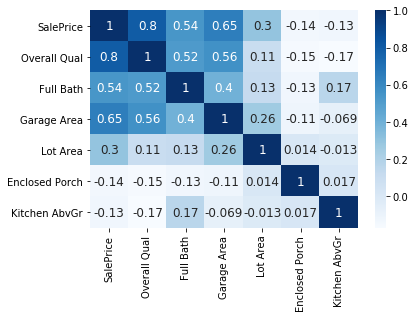

In [8]:
sns.heatmap(train[good_cols].corr(),cmap='Blues',annot=True,annot_kws={'size':12})

In [9]:
good_cols

['SalePrice',
 'Overall Qual',
 'Full Bath',
 'Garage Area',
 'Lot Area',
 'Enclosed Porch',
 'Kitchen AbvGr']

In [10]:
features = [x for x in good_cols if x != 'SalePrice']

In [11]:
features

['Overall Qual',
 'Full Bath',
 'Garage Area',
 'Lot Area',
 'Enclosed Porch',
 'Kitchen AbvGr']

In [12]:
X = train[features]
y = train['SalePrice']

In [13]:
poly = PolynomialFeatures(include_bias = False)

X_poly = poly.fit_transform(X)

poly_feat = poly.get_feature_names(features)


In [14]:
poly_feat

['Overall Qual',
 'Full Bath',
 'Garage Area',
 'Lot Area',
 'Enclosed Porch',
 'Kitchen AbvGr',
 'Overall Qual^2',
 'Overall Qual Full Bath',
 'Overall Qual Garage Area',
 'Overall Qual Lot Area',
 'Overall Qual Enclosed Porch',
 'Overall Qual Kitchen AbvGr',
 'Full Bath^2',
 'Full Bath Garage Area',
 'Full Bath Lot Area',
 'Full Bath Enclosed Porch',
 'Full Bath Kitchen AbvGr',
 'Garage Area^2',
 'Garage Area Lot Area',
 'Garage Area Enclosed Porch',
 'Garage Area Kitchen AbvGr',
 'Lot Area^2',
 'Lot Area Enclosed Porch',
 'Lot Area Kitchen AbvGr',
 'Enclosed Porch^2',
 'Enclosed Porch Kitchen AbvGr',
 'Kitchen AbvGr^2']

In [15]:
#create a new dataframe
poly_df = pd.DataFrame(X_poly,columns = poly_feat)

In [16]:
poly_df.head()

,Overall Qual,Full Bath,Garage Area,Lot Area,Enclosed Porch,Kitchen AbvGr,Overall Qual^2,Overall Qual Full Bath,Overall Qual Garage Area,Overall Qual Lot Area,...,Garage Area^2,Garage Area Lot Area,Garage Area Enclosed Porch,Garage Area Kitchen AbvGr,Lot Area^2,Lot Area Enclosed Porch,Lot Area Kitchen AbvGr,Enclosed Porch^2,Enclosed Porch Kitchen AbvGr,Kitchen AbvGr^2
0,6.0,2.0,475.0,13517.0,0.0,1.0,36.0,12.0,2850.0,81102.0,...,225625.0,6420575.0,0.0,475.0,182709289.0,0.0,13517.0,0.0,0.0,1.0
1,7.0,2.0,559.0,11492.0,0.0,1.0,49.0,14.0,3913.0,80444.0,...,312481.0,6424028.0,0.0,559.0,132066064.0,0.0,11492.0,0.0,0.0,1.0
2,5.0,1.0,246.0,7922.0,0.0,1.0,25.0,5.0,1230.0,39610.0,...,60516.0,1948812.0,0.0,246.0,62758084.0,0.0,7922.0,0.0,0.0,1.0
3,5.0,2.0,400.0,9802.0,0.0,1.0,25.0,10.0,2000.0,49010.0,...,160000.0,3920800.0,0.0,400.0,96079204.0,0.0,9802.0,0.0,0.0,1.0
4,6.0,2.0,484.0,14235.0,0.0,1.0,36.0,12.0,2904.0,85410.0,...,234256.0,6889740.0,0.0,484.0,202635225.0,0.0,14235.0,0.0,0.0,1.0


In [17]:
# seeing all the zeros, we'd probably want to go back and take out enclosed porch since that cuases a lot of 
#multiplication by 0

In [18]:
###join in sale price data
poly_df = poly_df.join(train['SalePrice'])

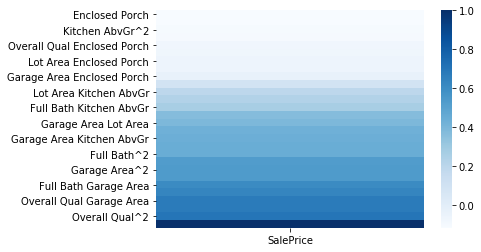

In [19]:
sns.heatmap(poly_df.corr()[['SalePrice']].sort_values('SalePrice'),cmap='Blues')

In [20]:
#we use holdout since we already have a test data set
X_train,X_holdout,y_train,y_holdout = train_test_split(poly_df[poly_feat],y, random_state=23)

In [21]:
lr = LinearRegression()

In [22]:
lr.fit(X_train,y_train)
lr.score(X_train,y_train)

0.7953143108671988

In [23]:
lr.score(X_holdout,y_holdout)

0.8141921863040259

In [24]:
from sklearn.metrics import mean_squared_error

In [25]:
pred = lr.predict(X_holdout)

In [28]:
np.sqrt(mean_squared_error(y_holdout,pred))

35006.07272369886

In [72]:
cross_val_score(lr,X_train,y_train, cv=5)

array([ 0.7623824 ,  0.74795863,  0.70815112, -0.04250441,  0.82951042])

In [ ]:
#regarding the negative, try a different random seed but we're guessing right now that it's a bad sample

In [71]:
cross_val_score(lr,X_holdout,y_holdout,cv=5)

array([0.85404017, 0.81604205, 0.84854185, 0.82354391, 0.79409082])

Because scores are fairly consistent but still low, this is a sign that our bias is still too high so we need to refine the model

In [42]:
test[features].isnull().sum()

Overall Qual      0
Full Bath         0
Garage Area       0
Lot Area          0
Enclosed Porch    0
Kitchen AbvGr     0
dtype: int64

In [73]:
X_test_poly = poly.transform(test[features])
X_test = pd.DataFrame(X_test_poly,columns=poly_feat)
X_test.head()

,Overall Qual,Full Bath,Garage Area,Lot Area,Enclosed Porch,Kitchen AbvGr,Overall Qual^2,Overall Qual Full Bath,Overall Qual Garage Area,Overall Qual Lot Area,...,Garage Area^2,Garage Area Lot Area,Garage Area Enclosed Porch,Garage Area Kitchen AbvGr,Lot Area^2,Lot Area Enclosed Porch,Lot Area Kitchen AbvGr,Enclosed Porch^2,Enclosed Porch Kitchen AbvGr,Kitchen AbvGr^2
0,6.0,2.0,440.0,9142.0,112.0,2.0,36.0,12.0,2640.0,54852.0,...,193600.0,4022480.0,49280.0,880.0,83576164.0,1023904.0,18284.0,12544.0,224.0,4.0
1,5.0,2.0,580.0,9662.0,0.0,2.0,25.0,10.0,2900.0,48310.0,...,336400.0,5603960.0,0.0,1160.0,93354244.0,0.0,19324.0,0.0,0.0,4.0
2,7.0,2.0,426.0,17104.0,0.0,1.0,49.0,14.0,2982.0,119728.0,...,181476.0,7286304.0,0.0,426.0,292546816.0,0.0,17104.0,0.0,0.0,1.0
3,5.0,1.0,480.0,8520.0,184.0,1.0,25.0,5.0,2400.0,42600.0,...,230400.0,4089600.0,88320.0,480.0,72590400.0,1567680.0,8520.0,33856.0,184.0,1.0
4,6.0,1.0,514.0,9500.0,0.0,1.0,36.0,6.0,3084.0,57000.0,...,264196.0,4883000.0,0.0,514.0,90250000.0,0.0,9500.0,0.0,0.0,1.0


In [75]:
y_hat = lr.predict(X_test)

In [76]:
y_hat[:5]

array([152597.20959561, 129432.57711448, 232445.72961971, 124026.58329727,
       160075.00223491])

In [77]:
submission = pd.DataFrame({
    'Id':test['Id'],
    'SalePrice': y_hat
})
submission.head()

,Id,SalePrice
0,2658,152597.209596
1,2718,129432.577114
2,2414,232445.729620
3,1989,124026.583297
4,625,160075.002235


In [78]:
submission.to_csv('submission3.csv',index=False)